<ins>**Question 1:**<ins>

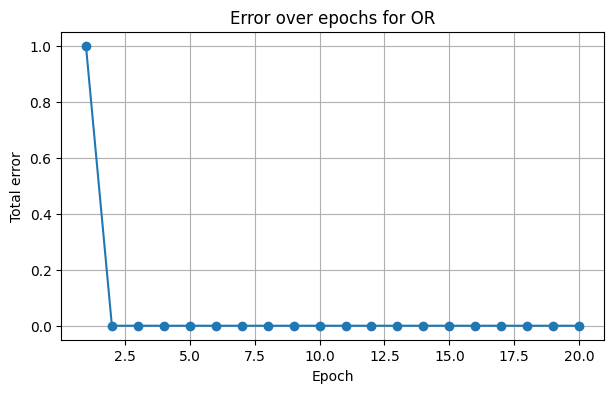

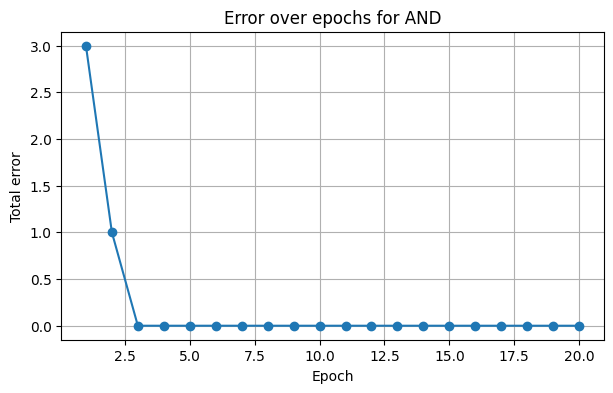

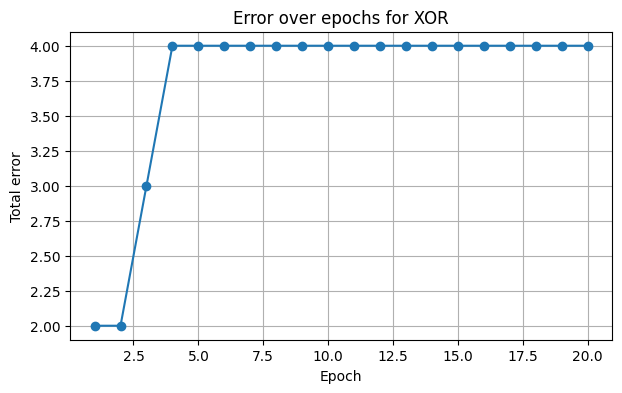

OR predictions: [0, 1, 1, 1]
AND predictions: [0, 0, 0, 1]
XOR predictions: [1, 1, 0, 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

class Perceptron:
    def __init__(self, input_size, alpha=0.1):
        self.weights = np.random.randn(input_size) * 0.1
        self.bias = np.random.randn() * 0.1
        self.alpha = alpha

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        if z >= 0:
            return 1
        else:
            return 0

    def train(self, X, y, epochs):
        errors = []

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                x_i = X[i]
                y_true = y[i]

                y_pred = self.predict(x_i)
                L = y_true - y_pred

                # perceptron update rule
                self.weights = self.weights + self.alpha * L * x_i
                self.bias = self.bias + self.alpha * L

                total_error += abs(L)

            errors.append(total_error)

        return errors


# input values
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# target values
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
y_xor = np.array([0, 1, 1, 0])

epochs = 20


# OR
p_or = Perceptron(2, alpha=0.1)
errors_or = p_or.train(X, y_or, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_or, marker='o')
plt.title("Error over epochs for OR")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


# AND
p_and = Perceptron(2, alpha=0.1)
errors_and = p_and.train(X, y_and, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_and, marker='o')
plt.title("Error over epochs for AND")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


# XOR
p_xor = Perceptron(2, alpha=0.1)
errors_xor = p_xor.train(X, y_xor, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_xor, marker='o')
plt.title("Error over epochs for XOR")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


print("OR predictions:", [p_or.predict(x) for x in X])
print("AND predictions:", [p_and.predict(x) for x in X])
print("XOR predictions:", [p_xor.predict(x) for x in X])

**Answer 1:**

In this part, we trained one single perceptron on the OR, AND and XOR functions.
The graphs show the total error in each epoch, so it is possible to see if the perceptron learns the function or not.

For the OR function, the error goes down and reaches 0 after some epochs. This means that after training, the perceptron can classify all input combinations correctly.
For the AND function, the same thing happens. The error also decreases to 0, so the perceptron is able to learn this function too.

For the XOR function, the error does not go to 0. It stays above 0 or changes between epochs. This shows that the perceptron is not able to learn XOR correctly.

The reason is that a single perceptron can only make a linear separation between classes.
The OR and AND functions are linearly separable, so they can be solved with one perceptron. There is a straight line that can separate the 0 outputs from the 1 outputs.

The XOR function is different, because it is not linearly separable. There is no single straight line that can separate its outputs correctly. Because of this, one perceptron is not enough for XOR.

So from these graphs, it can be seen that a single perceptron works for OR and AND, but not for XOR. This also shows why for more difficult problems we need a network with one or more hidden layers instead of only one perceptron.

<ins>**Question 2:**<ins>

**Answer 2:**

The network needs 10 input neurons.

This is because each sample in the dataset has 10 input features.
In a feed-forward neural network, usually one input neuron is used for each feature, so the input layer must have 10 neurons to pass all feature values into the network.

<ins>**Question 3:**<ins>


**Answer 3:**

The network needs 7 output neurons.

This is because the task is to classify each sample into one of 7 classes.
A practical way to do this is to use one output neuron per class. Then each output neuron represents one class, and the predicted class can be taken as the one with the highest output value.

<ins>**Question 4:**<ins>


**Answer 4:**

As an initial guess, we would use 1 hidden layer with 12 hidden neurons.

The task has 10 input features and 7 output classes, so the problem is more complex than a very small network, but it is also not extremely large. One hidden layer is a reasonable starting point, because a network with one hidden layer is already able to learn non-linear patterns. We chose 12 neurons as an initial value because it is slightly larger than the number of input features, which gives the network enough flexibility without making it too large at the start.

These values are only an initial guess, and later they should be tuned by testing performance on validation data.

<ins>**Question 5:**<ins>


**Answer 5:**

We would use the sigmoid activation function in the hidden layer and also in the output layer as an initial choice.

The sigmoid function is a sensible starting point because it was used a lot in the lecture examples and it introduces non-linearity, which is needed so the network can learn more complex patterns than a single perceptron. Without a non-linear activation function, the network would still behave like a linear model.

For the output layer, using sigmoid means each output neuron gives a value between 0 and 1. Then the predicted class can be chosen as the output neuron with the highest value.

This is an initial design choice, and later it can be compared with other options if needed.

<ins>**Question 6:**<ins>


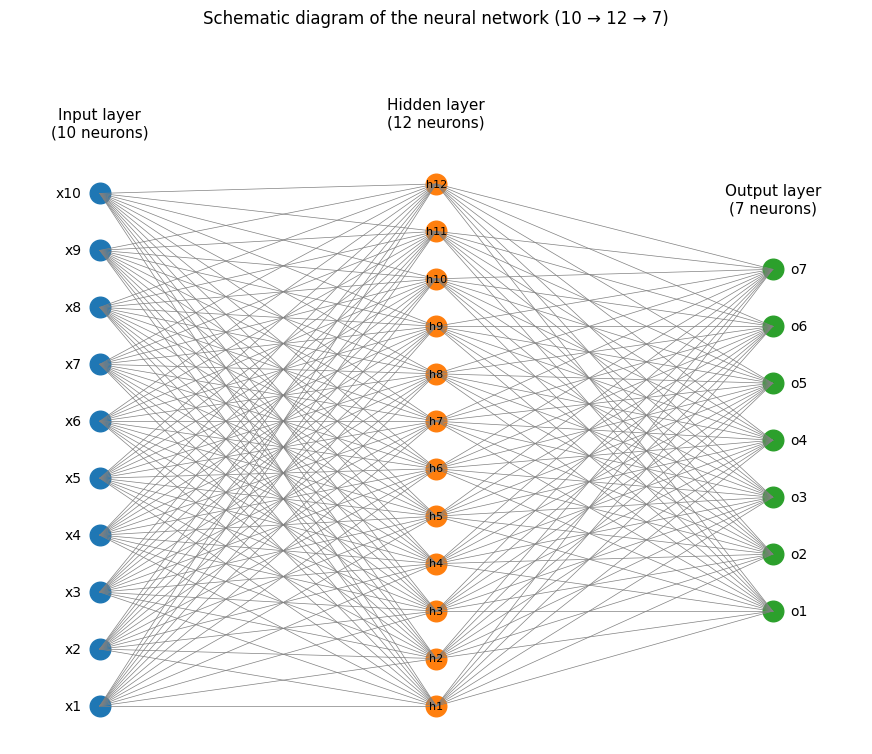

In [5]:
import matplotlib.pyplot as plt

n_input = 10
n_hidden = 12
n_output = 7

fig, ax = plt.subplots(figsize=(11, 9))

x_input = 0
x_hidden = 1.5
x_output = 3

# spread neurons out more vertically
input_y = [i * 1.2 for i in range(n_input)]
hidden_y = [i * 1.0 for i in range(n_hidden)]
output_y = [i * 1.2 + 2 for i in range(n_output)]

# connections: input -> hidden
for y1 in input_y:
    for y2 in hidden_y:
        ax.plot([x_input, x_hidden], [y1, y2], color='gray', linewidth=0.5)

# connections: hidden -> output
for y1 in hidden_y:
    for y2 in output_y:
        ax.plot([x_hidden, x_output], [y1, y2], color='gray', linewidth=0.5)

# neurons
ax.scatter([x_input] * n_input, input_y, s=220)
ax.scatter([x_hidden] * n_hidden, hidden_y, s=220)
ax.scatter([x_output] * n_output, output_y, s=220)

# labels for neurons
for i, y in enumerate(input_y):
    ax.text(x_input - 0.08, y, f"x{i+1}", ha='right', va='center')

for i, y in enumerate(hidden_y):
    ax.text(x_hidden, y, f"h{i+1}", ha='center', va='center', fontsize=8)

for i, y in enumerate(output_y):
    ax.text(x_output + 0.08, y, f"o{i+1}", ha='left', va='center')

# layer labels
ax.text(x_input, max(input_y) + 1.2, "Input layer\n(10 neurons)", ha='center', fontsize=11)
ax.text(x_hidden, max(hidden_y) + 1.2, "Hidden layer\n(12 neurons)", ha='center', fontsize=11)
ax.text(x_output, max(output_y) + 1.2, "Output layer\n(7 neurons)", ha='center', fontsize=11)

# more room above everything
ax.set_xlim(-0.4, 3.4)
ax.set_ylim(-0.8, max(hidden_y) + 2.8)

plt.title("Schematic diagram of the neural network (10 → 12 → 7)", pad=20)
ax.axis('off')
plt.show()

**Answer 6:**

The diagram shows the complete feed-forward neural network based on the previous answers.

It has:

10 input neurons, because each sample has 10 features,

1 hidden layer with 12 neurons, as the initial design choice,

7 output neurons, because the problem has 7 classes.

The network is fully connected, so each neuron in one layer is connected to all neurons in the next layer.
This gives the topology 10 → 12 → 7.

<ins>**Question 7:**<ins>

**Answer 7:**

To get an unbiased estimate of performance, We would divide the labeled data into three parts:

training set

validation set

test set

A sensible split is for example:

70% training

15% validation

15% test

The training set is used to learn the weights of the network during backpropagation.
The validation set is used to tune hyperparameters, such as the number of hidden neurons, number of hidden layers, learning rate, and number of epochs.
The test set is only used at the very end to evaluate the final model. This gives a more unbiased estimate of how well the network performs on unseen data.

This is important because if the test set is used during training or tuning, the performance estimate can become too optimistic.

To make the results reproducible, the data should be shuffled in a controlled way and a fixed random seed should be used before splitting. This ensures that the same train/validation/test split is created every time the notebook is run. It is also important to keep the test set separate and unchanged during all experiments.

<ins>**Question 8:**<ins>

**Answer 8:**

We would mainly evaluate the performance of the network using classification accuracy on the validation set and test set.

Accuracy is calculated as the fraction of correctly classified samples:

accuracy = (number of correct predictionstotal number of predictions)/(total number of predictionsnumber of correct predictions​)

This is a sensible metric because the assignment is a multi-class classification problem.
For each sample, the network predicts one of 7 classes, so the most direct way to measure performance is to check how many of these predictions are correct.

During development, We would use the validation accuracy to compare different choices of hyperparameters, such as the number of hidden neurons, number of layers, learning rate, and number of epochs. After the final model is chosen, We would report the test accuracy to estimate how well the network performs on unseen data.

Besides accuracy, it is also useful to monitor the loss during training, because it shows whether the network is still learning or if training has stabilized. However, accuracy is the main performance measure here, because it directly reflects the quality of the final class predictions.

<ins>**Question 9:**<ins>

**Answer 9:**

We would stop training when the performance on the validation set stops improving.
A practical way to do this is to use early stopping. After each epoch, we can check the validation accuracy or validation loss, and if it does not improve for several epochs in a row, we stop the training.

This is a sensible approach because at the start of training, the network usually improves on both the training data and the validation data. After some point, however, the network can start to overfit the training set. In that case, the training performance may still improve, but the validation performance will stop improving or even get worse.

By stopping training when the validation performance no longer improves, we can keep the model at the point where it generalizes better to unseen data. This also avoids wasting time on extra epochs that do not give a real improvement.

So we mainly choose to end the training in order to:

prevent overfitting

save computation time

keep the model at its best validation performance

As an extra safety measure, we would also set a maximum number of epochs, so that training always stops even if early stopping is not triggered.

<ins>**Question 10:**<ins>